In [1]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib.pyplot as plt

A liquid phase reaction (stoichiometry given below) needs to be processed in a continuous reacor system (operated isothermally).
$$ A + P \rightarrow 2P $$
Details on the reaction rate (based on component A) are given below:
$$ -r_A = kC_AC_B $$
$$ k = 1 \frac{l}{mol.min} $$
A feed with $C_{Ao}$ = 1 $ \frac{mol}{l}$ and $C_{Po}$ = 0.02 $ \frac{mol}{l}$ is fed to the reactor at a flow rate of Q =
2.5 $ \frac{l}{min}$. A conversion of $A$ of 85% is required.

In [2]:
def ri(CA, CP):
    rA = -k*CA*CP
    rP = -rA
    return [rA, rP]

Parameters

In [3]:
CAo = 1 # mol/l
CPo = 0.02
Q = 2.5 # l/min
FAo = CAo*Q
FPo = CPo*Q
x = 0.85
k = 1

# a) 
Determine the volume of a single CSTR that will be required to achieve the desired
conversion

In [4]:
FA = FAo*(1-x)
FP = FPo + x*FAo
rA, rP = ri(FA/Q, FP/Q)
vCSTR = (FAo-FA)/(-rA)
print(np.round(vCSTR, 2), 'l CSTR')

16.28 l CSTR


# b) 
Determine the volume of a single PFR that will be required to achieve the desired
conversion

In [5]:
def DE(V, var):
    FA, FP = var
    CA = FA/Q
    CP = FP/Q
    rA, rP = ri(CA, CP)
    dFAdV = rA
    dFPdV = rP
    return [dFAdV, dFPdV]

In [6]:
def event85(V, var):
    FA, FP = var
    return FA - FAo*(1-x)
xb = 0.99
def eventterm(V, var):
    FA, FP = var
    return FA - FAo*(1-xb)
eventterm.terminal = True

In [7]:
Vbound = [0, 200]
init = np.array([FAo, FPo])
PFR = scipy.integrate.solve_ivp(DE, Vbound, init, dense_output= True, events=[event85, eventterm])

In [8]:
FA, FP = PFR.y
VPFR = PFR.t_events[0][0]
print(np.round(VPFR, 2), 'l PFR')

13.89 l PFR


# c)
Determine the minimum total reactor volume required that will result in the desired
conversion if you are allowed to use more than one reactor in series. Also specify
the type of reactors used, the volume of each individual reactor and the sequence of
the reactors that you suggest.

In [9]:
xvals = np.arange(0.01, 1, 0.01)
CAs = CAo*(1-xvals)
CPs = CPo + CAo*xvals
rAs = -k*CAs*CPs
negra = 1/(-rAs)

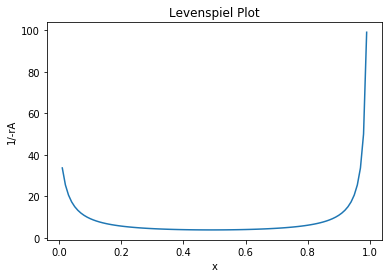

In [10]:
plt.figure(1)
plt.plot(xvals, negra)
plt.xlabel('x')
plt.ylabel('1/-rA')
plt.title('Levenspiel Plot')
plt.show()

In [11]:
inv_maxrate = min(negra)
xmaxrate = xvals[(negra == inv_maxrate)][0]

In [12]:
VolCSTR = xmaxrate*inv_maxrate*Q
print(np.round(VolCSTR, 2), 'l CSTR first')

4.71 l CSTR first


In [13]:
y = []
for i in range(len(xvals)):
    if xvals[i] >= xmaxrate and xvals[i] <= x:
        y += [negra[i]]
VolPFR = scipy.integrate.trapz(y, dx=0.01)*Q
print(np.round(VolPFR, 2), 'l PFR after CSTR')

4.31 l PFR after CSTR


In [14]:
VolT = VolCSTR + VolPFR
print(np.round(VolT, 2), 'l in Total')

9.02 l in Total
